### BinaryClassification problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # for dataset
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
X,y= make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [3]:
X.shape,y.shape

((1000, 2), (1000,))

In [4]:
df= pd.DataFrame(data=X)
df

,0,1
0,-1.743626,2.324037
1,1.718369,-0.229844
2,0.236445,-2.000340
3,-2.574887,2.100710
4,1.218897,-1.134877
...,...,...
995,1.198741,-1.408213
996,0.356877,0.422387
997,1.882607,-1.767473
998,-0.808814,-0.894977


In [5]:
df[0]

0     -1.743626
1      1.718369
2      0.236445
3     -2.574887
4      1.218897
         ...   
995    1.198741
996    0.356877
997    1.882607
998   -0.808814
999    0.807743
Name: 0, Length: 1000, dtype: float64

## Visualizing data

<Axes: xlabel='0', ylabel='1'>

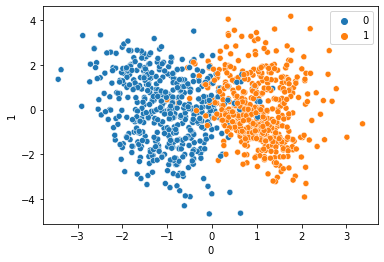

In [6]:
sns.scatterplot(x=df[0],y=df[1],hue=y)

In [7]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=0)

In [8]:
X_train.shape,y_train.shape,y_test.shape,X_test.shape

((670, 2), (670,), (330,), (330, 2))

In [9]:
## model's instance
svc = SVC(kernel='linear')
svc

SVC(kernel='linear')

In [10]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [11]:
svc.coef_

array([[2.50021042, 0.20113045]])

In [12]:
y_pred = svc.predict(X_test)

In [13]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,

## Checking Accuracy

In [14]:
accuracy_score(y_test,y_pred)

0.9242424242424242

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       168
           1       0.92      0.93      0.92       162

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330



In [16]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[155,  13],
       [ 12, 150]], dtype=int64)

In [17]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [18]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9226190476190477

In [19]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9281437125748503

In [20]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9253731343283582

### Hyper parameter tuning with SVC

In [21]:
parameters = {
    'C': [0.1,1,10,100,1000],
    'gamma': [1,0.1,0.01,0.001,0.0001]
}

In [22]:
gridCV = GridSearchCV(estimator=SVC(),param_grid=parameters,cv=5,verbose=2 # this shows complete Details its highest value is 3 
                      ,refit=True)

In [23]:
gridCV.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ....................................C=1000, gamma=1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END ..................................C=1000, gamma=0.1; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END .................................C=1000, gamma=0.01; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [24]:
gridCV.best_params_

{'C': 1000, 'gamma': 0.001}

In [25]:
# after Hyper parameter Tuning Prediction--
y_pred1 = gridCV.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       168
           1       0.91      0.91      0.91       162

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [26]:
accuracy_score(y_test,y_pred1)

0.9121212121212121

In [27]:
confusion_matrix(y_test,y_pred1)

array([[153,  15],
       [ 14, 148]], dtype=int64)

In [28]:
confusion_matrix(y_test,y_pred)

array([[155,  13],
       [ 12, 150]], dtype=int64)